<a href="https://colab.research.google.com/github/brunoodon/sprintIII_datascience/blob/main/MVP_SprintIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alertas de Vulnerabilidades Recentemente Exploradas**

Praticamente todos os dias, novas vulnerabilidades em aplicações são descobertas e atualizadas por pesquisadores e exploradas por atacantes. É essencial ter uma visão ampla da situação de ativos da organização em relação a essas vulnerabilidades e, tendo isso em vista, quanto maior for a quantidade de ativos e a diversidade de aplicações, mais se faz necessária a adoção de um arcabouço robusto de Big Data.











## Objetivo

Ter, de forma automatizada , alertas de hosts e aplicações vulneráveis, afim de que as mesmas sejam resolvidas ou mitigadas antes que virem ataques cibernéticos.

Premissas:


*   Um inventário atualizado de hosts e aplicações;
*   O Catálogo de Vulnerabilidades Exploradas (Known Exploited Vulnerabilities - [KEV](https://https://www.cisa.gov/known-exploited-vulnerabilities-catalog)), mantido pelo CISA;
*   Um repositório onde o inventário e o catpalogo KEV possam ser armazenados;
*   Uma Data Warehouse, para onde esses alertas de vulnerabilidades possam ser carregados;
*   Um fluxo de ETL para coleta no repositório, tranformação e carga desses dados correlacionados no Data Warehouse;
*   Uma plataforma de BI, onde seja possível a criação de gráficos e dashboards para ter uma visão mais analítica desses alertas.

Para este MVP foram utilizadas as soluções:

*   GenMyModel - para a modelagem de dados;
*   Azure Blob Storage - para armazenamento dos datasets de origem;
*   Azure Data Factory - para criação do pipeline e dataflow, do processo de ETL;
*   Elastic Stack - fará o papel de Data Warehouse, para armazenamento persistente dos dados e ferramenta de Analytics.







## Coleta

Esta fase será executada da seguinte forma:

*   Será feito o upload manual do dataset **assets.csv** para o Azure Blob Storage;
*   Será criado um pipeline para realizar a cópia da versão mais atual do Catálogo de Vulnerabilidades Exploradas Conhecidas (Known Exploited Vulnerabilities - KEV, mantido pelo CISA e atualizado diariamente), para o Azure Blob Storage
![image.png](.WmZOaR+/X/adEDnz+CZZG2I4LXNniuto7U3Py5wU4/q1f75XZs7OydyP9srd2icPbpW1q/VmlF6jszJ95/3FI5QruT8m7bmQQwRyB72+BW3f9vKu1wJZ73ju37wmvMBDX2gR/eHI/KjpxTm1epPsU4Vsd/YOlLWUx9XzUOefd89HTcut6+JnpcIf5Wv35l3kLAQgAAEIQAACHQSGFMhqyf5uuyXWOYGsz9GGT+ff9TKPbTK2LcnGFgfKGcTi2L0g6YB7YdI8Y4/imeItsr+a0J2R3S0zyFq/1W3vVomOX/2GXLr6crn7R+ZpfuvLFOOgL8h+W02XLxLV2/RZhdQlQXS3FJ+Y00XsW8Xafr7APOuqvy64PxZj0CvC6oDSA9/nEqciH6K0+ey0j3XnW0xeX4enZd+mVTL1+aeTF+fNyt5rV8na8mV06lbwc90tMi0zsnNDOaF1qnZ47tktsnb1ernxqRmZc7P3K7k/1nQWvodA7mDYt6Dt217edS+Q9W7o03Kjvkxiz4zMuJd02Q9E9KPmn7VI/ximx+L+eJdp9dKuconXxl15FzkLAQhAAAIQgEAHAfc31udKBv71wHsIgWwCuuvvutZ54nnZufl6ueL3Lq9evpR7vtnGE1mRqnbc2MLyto09pm9bI1NX7ZJ6/Vk8prHybXX59C7xNvvs/XLj9ZfLFZeVy6LLF5g266/ht5bRN4lHPtfCvS49oXuhP15VrVTMRdnGrRLIC+2Ps3uLZ+9NaKsTrs/pYasP3uH57HSMdRsC+fxpOfLoLXLDpy+XK8ql1MXb5guRfbV7/LFwobjeG+Noe7Gue7zx49feLUfCDZw5OWKPNn5sg9xYPsYQfhNWan/07bnAfQRyB8C+BW3f9vKux39MNI++eVGXbdy63b3FuvUubnnnNv3DmR57gVzuf/bRC/jGwjwMzkIAAhCAAATGkMBR2fl7zZmmYzsul6kwq1SEtGgCee55uVFXhu04LLP6eujGGKBG6kWpnk2PI7Eyz9hj5iFdMu1nJBcwgxxEUnP5bzHzps8dz4Y3X3t/i30/g13E2VkmvEk7LhNmkH/v/hrSpO6d2Sc3rF4ln9g+ncyIzs+t0acafczdJOrqj+WKxkh0uhtJXW0XNcs8dmSIse7MAxtk6pItsu/N02F2t75OyzH65uYMsv53Zpd+vXtZ/pwKZX3m+za7RVQ8F108BrlR9s6KtM4gr4T+GDXowg4QyB38+ha0fdvLu94UyNVS6/Ayi/K/eWp5DugTt5U/cukPVXocCeQ5md5+iUyt/4Ls1j84+kzFwbtl74t5DzkLAQhAAAIQgEA3gTDIXr1Grrxtb/Fm4Ae+EJ7H9c+21gNvESnFypU7DsuZcolwlJ7+HU+P/d/1cjbtmgeOyplTs3Lkvo3hZV0LnUFuewa5Gnv86O4Q45Xbn5eZUO/18lH9r4PKpadezCq9zuO5ablV363yh7fIgfA88bTc8ch0KSDK/xpKn0sOz6uWY6MTe4vnhz+/K7yfZfbYXtFnkAvR0VIm+8znyvlvoHR1or7I7RPX3y17n43fYt3JLe1/6fHA/fG07Pv8Gpm6ZFMxBtUXVF1WP4Pc6UN0CXbb0bH0oGPdsBLhkq2y373jx/6/cvVHl0Z/cc9hmT01K8ceLZ5BDn15nf73WDNhHK19b/dTOjc9LXd/6eni+ePZ5+XW3ysE8uyj3wjPXM/NzcnMI9eHZ65VIMsK749Rky7gAIHcAa9vQdu3vbzrOYFcXzDR/4OcvKkxevN0+kOVHvsfLnXk/Izsrd4UqW/T2xJeOpD3kbMQgAAEIAABCHQS0DfmRm9bvrzxduRIAOsA/uv2P1Pos4vlm5437pKwBDT9O54eR3/X/fLNq+TuR+9u/S+kOkWqBpgsd5WusYeIe/v1xXLDA08XL/0aRSBr3VpX9XbpDXLDozMiZw/L3eW5j376btkbXkJaCmRddfejXeX/3lG84VrfyD1QGXvjty533XM0O6Pa2d5jnDh74O76jeer18jHL7te7n51rptb2v/S42H6o2/TDVtl/6PuuXeflmnvCLvPm9rRjIOOdd2SaP0fX3Z/aVV4H1CxFHtOju2xt1WvkY/rC+H03T/hDdnuzdfrS4YyI7uvXy/hrer6dus/vz8ssT7z7C3Rm9i3PVU/mBD68Aruj1GbjniAQO4A17eg7dteh+skQQACEIAABCAAAQiMREBvTnxBrrzsFpmuXhg2kiEKQQACY0gAgdzRaH0L2r7tdbhOEgQgAAEIQAACEIDAyAR0RV7+v7Ya2SQFIQCBsSCAQO5opr4Fbd/2OlwnCQIQgAAEIAABCEBgFAIv7pIb/nyDXLFpr+h/k8kHAhBYWQQQyB3t3beg7dteh+skQQACEIAABCAAAQhAAAIQgMCQBBDIHcA+c92fyuvHjnXkGDxJ7ag9PhCAAAQgAAEIQAACEIAABCCwPAkgkDva5Zln9gdRqzO/C/2qOFZ7fCAAAQhAAAIQgAAEIAABCEBgeRJAIC/PdsErCEAAAhCAAAQgAAEIQAACEFhiAgjkJQZOdRCAAAQgAAEIQAACEIAABCCwPAkgkJdnu+AVBCAAAQhAAAIQgAAEIAABCCwxAQTyEgOnOghAAAIQgAAEIAABCEAAAhBYngQQyMuzXfAKAhCAAAQgAAEIQAACEIAABJaYAAJ5iYFTHQQgAAEIQAACEIAABCAAAQgsTwII5OXZLngFAQhAAAIQgAAEIAABCEAAAktMAIG8xMCpDgIQgAAEIAABCEAAAhCAAASWJwEE8vJsF7yCAAQgAAEIQAACEIAABCAAgSUmgEBeYuBUBwEIQAACEIAABCAAAQhAAALLkwACeXm2C15BAAIQgAAEIAABCEAAAhCAwBITmHiB/P6Z08IXBvQB+gB9gD5AH6AP0AfoA/QB+gB9gD4wXx+YeIG8xDccqA4CEIAABCAAAQhAAAIQgAAExpQAAnlMGw63IQABCEAAAhCAAAQgAAEIQKBfAgjkfnliDQIQgAAEIAABCEAAAhCAAATGlAACeUwbDrchAAEIQAACEIAABCAAAQhAoF8CCOR+eWINAhCAAAQgAAEIQAACEIAABMaUAAJ5TBsOtyEAAQhAAAIQgAAEIAABCECgXwII5H55Yg0CEIAABCAAAQhAAAIQgAAExpQAArmj4Z55Zr985ro/lav/6FML/qodtccHAhCAAAQgAAEIQAACEIAABJYnAQRyR7uoqH392LGOHIMnqR21t9ifY0ePyuWXXSaf/OTvN76//duXypPf/a786le/Wmw3sA8BCEAAAhCAAAQgAAEIQGDsCCCQO5pMZ477/PRtL+ebCuQ777gjlyS33XarXH31VYjkLB1OQgACEIAABCAAAQhAAAIrnQACuaMH9C1o+7aXc71LIKtwfvmll2Tbtv+BSM7B4xwEIAABCEAAAhCAwKIQ0DGqrnDU7aifm7/8ZdHvQj5a/zUbN8qpU6cWYiZbVn2bWr1qaB/37N4tN/zXTXLu3LmsXU3XL5+lIYBA7uDct6Dt217O9S6BfMtXbpbf/S+/E74XX/wb8sorr+RMcA4CEIAABCAAgQtMQAfDOtDW74ZPfjIazPs0Tc8NrHXwr+d1q1+1oXkv+a3/HAkUHTfouVyaIfC2fH4t8/3vf9+yha0JBE3zA/qucl1pkfHMgdaRxqTZvB+DCCq14zl7ZhqMKcrHAAAd4klEQVRLLlatp8v3NC3nZyaksTmlYk77mPHR7SCsL3SA2i5dAlnTTchrv/D9uMv3+ex2lZ0vbRg/Uls+njSN4zwBBHKeSzjbt6Dt217Odb0I2pZY+/x6oaV/1Hz6hdh/8fg5+Y1vvC5vv//LC1E9dUIAAhCAAASWBQEVZ/ffd1/li/7N9iJ4kMGy/o1XsWIixv7m69aEoIlAn+brMQfMlh6rX1pOP+nAW/0ygZTa7iq3f//TlU3vn9Wf25p9HfOo2FFf7ON5pfFbHr81W8ZF0/Sc3WDwedP9rrjUp82b/7J1VjC1NW7HylbjM/bGWvkv54/62yWQtQ/bNTHItWaxLmZ7D+OH+eO3/hr259nPE0Ag57mEs30L2r7t5VzXixOBnCPDOQhAAAIQgMB4EkgH9H4An4vIC5d00G4iRgfM6aDZlzO7uXM+TUWk2snl00G9CWYro1vvgz+v+4MKUyun+b1Azvnh41R/UgGn5+771rci0ZRys/p0m7Oh59O4fL2+/KTsD8Jax6R640H7yZHDhyvG1m7/8Pjj1QqGtK9oO9nstN248eytf+k5y6fM7ePL+5sf6fVk+XWbpqkN/fo09dnqszSt187p1vzwvllei137nOa1Onz86oet7NDYNa+VV1+8XR+bpmk+88VsWp1ql8/8BBDIHYz6FrR928u5rh1/sQTybc+elIs+dyh8V9/8WjXTqzO+eqxp/+HGV0VngvWjWz3W8z5/7vw//PD9yrbm17r08ycPH6/O27mQ4P7xfq2/58fy7x982Kj79VMfiKZpPfZRP6789owdsoUABCAAAQgsSwKp0OoaHGsAOhawmcu0rKZreR1Et6XZ4D61lcLRQbcO3nXr9y2f2jFhY+d0m8tr6TmfLC23VVvzCWTPw2I3W1af5vGzinpsAsVEjJVJbdj5NC61bUJFt3o8SZ9BBLIXb56xsjLhrHbs2Bhp//R9R0Wp5vPsTQhaGbVvS6M1r4pK3epHy+lXP96PcML9ozYtn57WY/3qx/qEpfv6LN2uOytredUPjUd9tVgtLc2r6b5PW73mh249G7Vpx35f7fqP1mes/Hn2mwQQyE0m1Zm+BW3f9ipH3Y5eRIshkFV03vTUu0F8anUqXPWr51PhqekqmnW5tIllczE9r4LVi1q/xFqFr9bR9dE8Vl7z3XPwPVExnKs7tafH+uUDAQhAAAIQWK4E0kF46mc6WNZ0PxDWdD8Q13Q9p9/Utg3E/SDa2/J124Bf7ehHy3qBaee8YNBzaTk9Z4JBRWTqq6Z3fVIxoXnVhrej+yYgvC3vs9/3eXTf/PNc0jy5uHwetW/izZ8f532N2S+xTjkpd+sfGqdn3NZumj+16xl5m5rXt7Pm8+m+nLad5fV++Dy6rza9z/44LWdtbv1C062/5+IzW21p5p/ms33zr6us55X6aOVzsfk09mMCCOSYR3TUt6Dt217kbHmgF8ZiCOS0LhW2Jl51mwrNNuGcilQVzCpwdati2gtkL57T+vVY69AZ4FSEt9VtM8aa3lY2Vw/nIAABCEAAAheCgA6Kc8LO++IHx3peB99aRrf68cLAynkRoek2y6nldIBvA/7UlpXXsUYq9nJ51Y73P1fObNpWywzzMiut18+2qR0TLhaXziSacLF6Um5dwkLLqF+paDFbg8SleU3kWLlx36ac01ly3880Vs84127GJ9eXjJW3qfnTNjEbml/bzPqAbi2v98Ps2tbb13PeXq6c5td69KPp1s80Bp0h9/WbD22xm3++TvPLzrWx8X5Y3H72Po3F7LLNE0Ag57mEs30L2r7t5VzXi3OxBLIKVltirVsTyCZI/dJo9U1Fry291rL6UYHsbei+LctOBbLP72eJg6HSvolrO2fbXN1eFHuBb2XYQgACEIAABJYLARsQz+dPOthOhZwee5FqosYG9d5+OvhObWleLwLSsqlQ1Rhs0N9WztuwfT/Yt3Nt2zT+XL4cS40tFS963CbOfSy+jmHjUjuT8klvMqRxaTv6eJWVrTLItZu1Uy7NbHubuTaxvpP2e9+XvR9m17bmQ+44V87q0/y+L6TXktnTbS4+H4vft3IWd65sWzukDNLYzDbbJgEEcpNJdaZvQdu3vcpRt6MX52II5HQ2NycwTSibGDa3VKzakmcVyOlss+XLCWRLS2ee9by3a/nSbZrH6ldxn/qZluUYAhCAAAQgcCEI+IF2Wr8OkNvecJ0bKKeCOB00e/s2CNdzbbZ0hkz9y338wN4P5HO2rLym6fOl9lHb6ey0peW2vp5cutozUabpPkafP82nPlmcWofOxik7b6MrLs3X9YZrX/e47s8Xf8raM861mxdwWtbf2Gl7Btnf0ND2sVlT3xetzdSmfrwfKfu0nPcpV05tWr/QdJtBTuv09bTF7v3z14Da1TjVF7Pr2bRd06m/3lfvD/tNAgjkJpPqTN+Ctm97laNuRy+GxRDIqUBVgWkzyK76cC4VwF44qwhedfNrjWXRaqNLIJtAf6dckm3iVn3ws8v6DLLWZx9ft9Wh+XVptopnPhCAAAQgAIHlRkAHvLnZTT1vYs3S/UA5HaBbXDbA1jImIDRNBY6WN1s2ANe0nK20bitnA/vUngmH+cppebPlBc98Akz9zIkNz8/Hq/m1Lh+nntOPxuuFtOYxn3RrsWheszFqXEWN4//vfO1jnCxSzzjXbsrct43vF7qvH29T86ogtT6c9h07r+2n5cyG98N8s23a771PuXJq0/pGWja9Hsy/ttjNP/XF92GNo+st1pqudaXlrD49n6szFOCfLAEEchZLcbJvQdu3vZzrenFeftll4e6r3n1q+176v11SXdA5O+k5E5q2PNoEcu68llXxacur06XXKm7Njm690NZ9y69C2/LZW7CtPhPIWpeVMVtddVt5X2caK8cQgAAEIACBcSTgB+sL9b9PW6P6ooN69cMG/6PaodxkElDx6kVlX1Euh77fVyxmRwX3YrAy+5O2RSB3tGjfgrZvex2ukwQBCEAAAhCAwAoioGJSZ5J0u9BPn7YW4osO6v2M4kJsUXbyCCyWQNbJJr/EedzJTVo8S9EeCOQOyn0L2r7tdbhOEgQgAAEIQAACEIAABCaWwGIJ5IkFRmADE0Agd6DqW9D2ba/DdZIgAAEIQAACEIAABCAAAQhAYEgCCOQOYH0L2r7tdbhOEgQgAAEIQAACEIAABCAAAQgMSQCB3AHsM9f9qbx+7FhHjsGT1I7a4wMBCEAAAhCAAAQgAAEIQAACy5MAArmjXZ55Zn8QtTrzu9CvimO1xwcCEIAABCAAAQhAAAIQgAAElicBBPLybBe8ggAEIAABCEAAAhCAAAQgAIElJoBAXmLgVAcBCEAAAhCAAAQgAAEIQAACy5MAAnl5tgteQQACEIAABCAAAQhAAAIQgMASE0AgLzFwqoMABCAAAQhAAAIQgAAEIACB5UkAgbw82wWvIAABCEAAAhCAAAQgAAEIQGCJCUy8QP7p7DvCFwb0AfoAfYA+QB+gD9AH6AP0AfoAfYA+MF8fmHiBvMQ3HKgOAhCAAAQgAAEIQAACEIAABMaUAAJ5TBsOtyEAAQhAAAIQgAAEIAABCECgXwII5H55Yg0CEIAABCAAAQhAAAIQgAAExpQAAnlMGw63IQABCEAAAhCAAAQgAAEIQKBfAgjkfnliDQIQgAAEIAABCEAAAhCAAATGlAACeUwbDrchAAEIQAACEIAABCAAAQhAoF8CCOR+eWINAhCAAAQgAAEIQAACEIAABMaUAAK5o+GeeWa/fOa6P5Wr/+hTC/6qHbXHBwIQgAAEIAABCEAAAhCAAASWJwEEcke7qKh9/dixjhyDJ6kdtbfYn2NHj8rll10mn/zk7ze+v/3bl8qT3/2u/OpXv1psN7APAQhAAAIQgAAEIAABCEBg7AggkDuaTGeO+/z0bS/nmwrkO++4I5ckt912q1x99VWI5CwdTkIAAhCAAAQgAAEIQAACK50AArmjB/QtaPu2l3O9SyCrcH75pZdk27b/gUjOweMcBCAAAQhAAAIQgMCiENAxqq5w1O2on5u//GXR70I+Wv81GzfKqVOnFmImW1Z9m1q9amgf9+zeLTf8101y7ty5rF1N1y+fpSGAQO7g3Leg7dtezvUugXzLV26W3/0vvxO+F1/8G/LKK6/kTGTPvf3+L+U3vvG6vHg8f+FmC03QyWHiV0arbn6tF1b/8MP35U8ePt47SfVR21PjWqqPxnHbsyez1XlmnrXur775NVEOuY8vl0vnHAQgAIFxJaCDYR1o63fDJz/ZGMx///vf70zXwb8OuHWrX7Whti75rf8cCRQdN+i5XJqx87Z8fi2jfviPCQRN8wP6rnJdad52bl/rSGPy8aofOT+9rZyNND3XBpon9d18yfmgfnSJIF/nOOyrmNN4jLFuFypelyJubbMugazpJuS1b/h+3OXffHa7ys6XNowfqS0fT5rGcZ4AAjnPJZztW9D2bS/nul4EbUusfX690NI/aj493feiJU1bCccLib9LGM7HbqUIZM+hi7XyWH/Pj+XfP/jQF2EfAhCAwEQRUHF1/333VTHp32wvrPTvtz+uMrodzaNixUSM/c3XrYk9E3E+LWfXbKl59UvL6ScdeKufJpBS213l9u9/urLp/XPhNHbNvo55VOyoL/bRNI3D/LTz6bbLhuW1PMbMzttW6928+S9bZ/4sX9oOdn6ctxqTxm7sLUbtB8v5o/52CWTtw3ZNaCyDxjNoXxiFzTB+5Oz7aziXzrmYAAI55hEd9S1o+7YXOVse6MWJQM6RWdi5LtE2n2UEckFoUA5drBHI8/U20iEAgUkk4Af0KkJ0AN8l/rxwSQftJmJ0wJwOmn0545g759NUiKqdXD4d1JtgtjK69T7487qvcQ0ibq2c5k8Fchqz5dWt+pMKnpwNK6P57/vWtyJB5W2kDK1cuh00X1puOR/n2tzHqZx0TKo3F7RNjxw+XHE05v/w+OPVCgbN7z/aTjY7reW1Ps/e+pees3xav318eX+Dw19Plte2aZra0K9+LE19tvosTeu1c7o1P7xvltdi136lea0OH7/WZSs7NHbNa+XVF2/Xx6Zpms98MZtWp9rlMz8BBHIHo74Fbd/2cq5rx18KgaxiR5e+qpjRZbN6rN+LPndI/sONr0bLi3UZrJ7TNP3aMls9f+W3Z6rZQBU/ZlNjs9lTzafLge85+F7DRo6BndN6rE71TT/qr1+y65foap6bnno3zFCmceREm8Wreb3f5u/rpz6obKV5fFnj4f2z/Bqz+W5x+W1OMGp+Pa92vW3P23zUuCw2rcvaKa0z56+VU2bqr9al55SFHts581dttPHN+aPnrA7dV/tmV7caoy+n9eixxeDbxPuV9k/zT2eldXba6jB2vl6NIa1Ty2sey2/22EIAAhDoi4AXHfp3Xmft9GuDYD9w1jotjwoKX9b80UGzlmlLs8F9asvK21YH3SZm/b6lqx0TNnZOt7m8lp7zydJy29zAX+M3cWECxMpa7Has25wNPW++qD0/4+htaB5rB93qcfrJCck0zzge5+IyZhqPcvLizXNU5iac1Y4dGz/tn77vqCj9/9u5m9xKkioMw9tiDsybbYCYshRWwZg5vQXGxZgWYsAKGr2X/kqfT0dmVdlht8O8KbnyL+LEiSfTUp6b10W7tk8hmD7Ez1ejaUtRyTq50Jel83gcqH+ImXYcZp8fFvpxX+V8j5fz/W2CjkUezIdcM9fEyTjZn/djxk0erNuGmNnv7UfS9Q/xY1WH3VwIWCAvUHJod0G7O17y7DW/RK9dIFMI9NdcU0BQsLD0+RQmOZcihH22KZApOFgo0H7150+f9ylGUgRR1LDPQvsv/Y0v/TpH+qaA6XN9nO0unmiXIqsLNXLoObLfMWcB1WOkL8dYpgc5E4sldmn7ODj+mXmxTwzW5Jg504288oFE55hx4pX95EGM5ND5pl3OMQZ90m9eJ9pd+c588vfujJHtxE+emVP+lvqq7Q8/mSQv+s0l84oXsf7y9/88ua7pk7aJx37fx2nnWgEFFNghMB/CecDtQmw+TDNmPwj3Q3ry4Rg/M3YexPshumOlP+s88BOHhb5dROZYFwyrfhxLwcC8UiRw/GuW1fy7X2L3nPo826sYPZ/enn17n3Yp0Po4Y6eA6eOnb3MPcH2ZN8u05lrm/uB8O67M037Gbae04Rix5/3S57sf1yBtO49uk5idM9vZn/3yO5B7i/O531fzS6yrc8mPdtlOfnd922vmmP6rufU5t58KWCA/9Xiyt7ug3R3vSbI/7fCL8ZoFMm8AUzRm/C6gONbFzjzHeQqLFFWsaUORwfaf/vrPJ/sUKh2P/rNASR5Zr873mLRjLOaSgjHHUiCx33G6+OrtHjNF0sw3c6Ttqi9j8kOOXfzRfuad8XpNfNrN9ombtuSV+XaOq5yS8+pc4q7OZSzW+MWE/cRMm/a9ymeOMY26H3kxRhb65sOCOXbaZN02Oca64/fxGKRNXLuN2woooMBLBXgonoXVqtjqooCHb/qwZunCIPl0e87nDSj9eMDPA/+Mlf48a8xCcNV25rrql5hZ0yf/0VWO3a0Zd37FerYn5iw4us2M0QUH7e6Kjo7DdgqZPs7YMe3jp2+nQMz90x/cMLe+z9hvx2nO+dit7qVYdUzaz+uaGLTHvHNL284jcbPu+BzreKt+tM+15XwXyLwh7/HZpv3V3JNfj5m8cuzKpvPIvPvt/ZxL4rpeC1ggr10eR3cXtLvjrVLnl/O1CuR8dTbFWMa/K0y6kEj7LkZSAHKM4rjXKTpWRQoFz8wj8VN45auyWXfxScz5FnpVRGWcLtS68MqYrNN25ttx6RvH5MU6fVn3Ep8+NrfTZhak0568VqY9t8RO37t8V/2mfb8xboeMk3m3Wcftbfow13kd8waZnNuU7YzfedFuLjGcxzMmsfqDobbMHFZ9PaaAAgo8VyAPxLN/P4TnHA/HtGfh4TgP2tnvIjtFTR7qE4P1fPiesWizGj99Z6FKTsnlql+Pn+1+2M+xq/Wq2JhtO495jv0ZIwXGLG6+pnDva5HY/YHFavxTj80PEuY8pgX3QL5lMM3pm3t+dS6xO+bquube4Rr2fd/3cueRuFknh9X+ql/Go33f48zh6rqv5tdz6e3kkXmv+l5dh2kw55bYrn8uYIH8c5PPR3YXtLvjfU60NvjlfK0CmUKEr0HPwpKCows7ipq8uZvnSLWLkbQlLsd7P4VMF0+Z6l1RMgvF9Ok1/fnpYov9jEnbjtOFWm8nZred+XbczI/1XGbxx/mV3+yXmPRPAZy+PZ8u6jrH1Xzox09ir/Kd/VKEkgdLm7DfDvP8VT5zjGnU/ZLzY/CLf2aOaTbj5nivu03mlmMrn+7rtgIKKPAtAv2gPfulwOVhl4W2eZu7elBOex6WWeZD8+PgT//kIZzdq1j9ldruy3Y/2PeD/CpW+nKOvy/N0vPJsbt1j5N2xCMOC+d5k5b59xzTfhUj51gTK4Ud+x3j7n/npi3j0v4jLnfXdTqx344r8y7gMOsC9+pvkPtDC6zz1rTvxeSS69B5zOsy+3VOq37EzL3F+bxBnmP2OFdz7/zyO00/4jJPcknctmH83s9YM9/ONW1crwUskNcuj6O7C9rd8Vap88vwmgUyBQlFQd7MkQOFCcVPFoqFFMi0py19WGaBkkKj//aYN8m930VQxmC8xMyxXpNTF799rosa2iQOMfstYceYhRptO35iMp+ZL22JlYV9fubCGIyffLK/ajv7JmaP0znFPTl3jnNuxCZOYiX2HHP2m/uM0R+mEOfK9yqfGbPnRD7db443880+eTC3mBCTccgtc2afv0HupcfiOG35QIL71UUBBRTYKcAD73x7yX4exFP0cawLhPmAnpzygE37FBCco8DhwTpj5QGcc6tYPW76sM6D/Yy3ynfVj/453vP5UgFGnlfFRuKxTh60Z6ye51UMjmfB4qpAvso9fVfj5dzp6y9dnzn3dry6bn1t2pZtlo5JWwrS3MPz3slx7gH6JUbnMa/BvO8ZIzmt+hEz99fsO38fkt/V3JMfOREz9zDzuPtfrDnPWLNfxuP4asxHB/9ZClggL1n+d3B3Qbs73ip1fjl/9913j0+T+fTp6ue3v/n151/oVZx5bBYqFAd87ZTigm2Kjiy0pRBjzUJhQZGcr7/Spxf6p3DjOOe7kJqFCW0Yb8bpmGmTMZPrLKJ6n5gUO4xN+85hzn/G7/xnvuwz/8RLYZbc+sOGtM34vFlv2znH7GPRcTje43COWHnD3Dmu5sY14WfGIa+Ms+pHHpkX3zjAhbFY7nyv8plj9JwYq/sxRo9PHozZfXKs50UfFsbKtacdxzte5v1oXPd1+ue4awUUUOCXEuiH9ZfmsDPWc3PhoZ488vD/3Dj2+5gCFK5dVO6a5Xu493fNJXEouF/DKvE/2toC+eaK7i5od8e7Sd1TzxCgmEpR+IzudlFAAQUUUOAXE6CY5E0S65cuO2O9JBce6vP27iVx7PsxBV6rQOZlU3/F+XS9jzaft7geFsg3yrsL2t3xblL/vzlFUZs3lllz7DnLey6QeVPKG8zMkfV8o/mcOdtHAQUUUEABBRQ4UeC1CuQTLcx5r4AF8o3n7oJ2d7yb1D31DIH3XCA/Yzp2UUABBRRQQAEFFFBAgW8UsEC+Adtd0O6Od5O6pxRQQAEFFFBAAQUUUEABBb5RwAL5BuyPf/j9j//49OmmxdefIg7xXBRQQAEFFFBAAQUUUEABBd6ngAXyzXX5/vu/PYpa3vy+9IfimHguCiiggAIKKKCAAgoooIAC71PAAvl9XhezUkABBRRQQAEFFFBAAQUUeGMBC+Q3Bnc4BRRQQAEFFFBAAQUUUECB9ylggfw+r4tZKaCAAgoooIACCiiggAIKvLGABfIbgzucAgoooIACCiiggAIKKKDA+xSwQH6f18WsFFBAAQUUUEABBRRQQAEF3ljgwxfI//7XDz/6o4H3gPeA94D3gPeA94D3gPeA94D3gPeA98CX7oEPXyC/8QcODqeAAgoooIACCiiggAIKKHCogAXyoRfOtBVQQAEFFFBAAQUUUEABBfYKWCDv9TSaAgoooIACCiiggAIKKKDAoQIWyIdeONNWQAEFFFBAAQUUUEABBRTYK2CBvNfTaAoooIACCiiggAIKKKCAAocKWCAfeuFMWwEFFFBAAQUUUEABBRRQYK+ABfJeT6MpoIACCiiggAIKKKCAAgocKmCBfOiFM20FFFBAAQUUUEABBRRQQIG9AhbIez2NpoACCiiggAIKKKCAAgoocKiABfKhF860FVBAAQUUUEABBRRQQAEF9gpYIO/1NJoCCiiggAIKKKCAAgoooMChAhbIh14401ZAAQUUUEABBRRQQAEFFNgrYIG819NoCiiggAIKKKCAAgoooIAChwpYIB964UxbAQUUUEABBRRQQAEFFFBgr4AF8l5PoymggAIKKKCAAgoooIACChwqYIF86IUzbQUUUEABBRRQQAEFFFBAgb0CFsh7PY2mgAIKKKCAAgoooIACCihwqIAF8qEXzrQVUEABBRRQQAEFFFBAAQX2Clgg7/U0mgIKKKCAAgoooIACCiigwKECFsiHXjjTVkABBRRQQAEFFFBAAQUU2CtggbzX02gKKKCAAgoooIACCiiggAKHClggH3rhTFsBBRRQQAEFFFBAAQUUUGCvgAXyXk+jKaCAAgoooIACCiiggAIKHCpggXzohTNtBRRQQAEFFFBAAQUUUECBvQIWyHs9jaaAAgoooIACCiiggAIKKHCogAXyoRfOtBVQQAEFFFBAAQUUUEABBfYKWCDv9TSaAgoooIACCiiggAIKKKDAoQIWyIdeONNWQAEFFFBAAQUUUEABBRTYK2CBvNfTaAoooIACCiiggAIKKKCAAocKWCAfeuFMWwEFFFBAAQUUUEABBRRQYK+ABfJeT6MpoIACCiiggAIKKKCAAgocKmCBfOiFM20FFFBAAQUUUEABBRRQQIG9AhbIez2NpoACCiiggAIKKKCAAgoocKiABfKhF860FVBAAQUUUEABBRRQQAEF9gpYIO/1NJoCCiiggAIKKKCAAgoooMChAhbIh14401ZAAQUUUEABBRRQQAEFFNgrYIG819NoCiiggAIKKKCAAgoooIAChwpYIB964UxbAQUUUEABBRRQQAEFFFBgr8B/AXvQiL3D+TF/AAAAAElFTkSuQmCC);
*   Os 2 datasets serão adicionados ao Data Factory e inseridos no Data Flow como fontes de dados


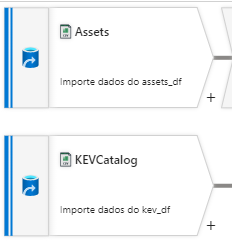
.

Visão do Dataset Assets:

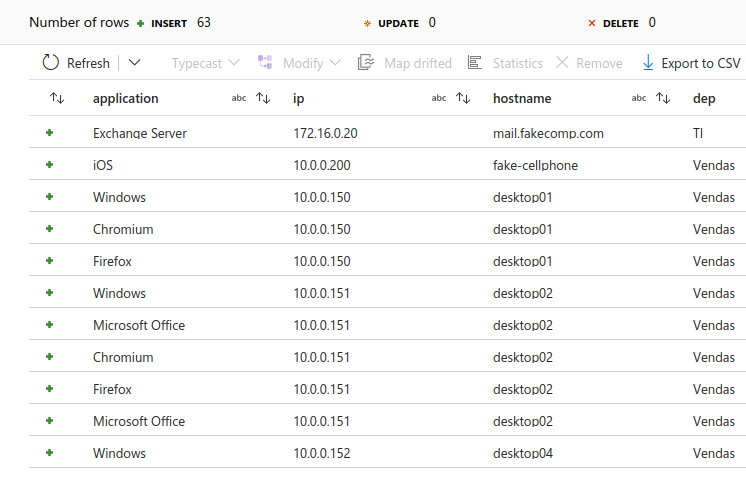


**Campos:**

application - aplicação do cliente;

ip - IP do ativo;

hostname - Hostname do ativo;

dep - departamento ao qual o ativo pertence.


Todos os campos são do tipo 'string'.

**Visão do Dataset KEV Catalog:**

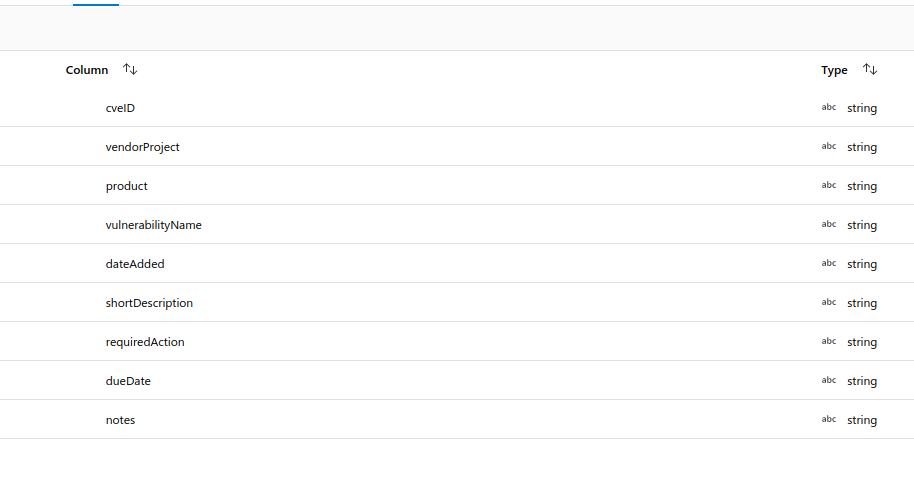


**Campos:**


cveID - Código único que identifica cada vulnerabilidade encontrada, por fabricante ou pesquisador;

vendorProject - fabricante da aplicação para a qual foi encontrado o exploit da vulnerabilidade;

product - aplicação vulnerável;

vulnerabilityName - nome da vulnerabilidade;

dateAdded - data do registro da CVE no banco do [NVD](https://colab.research.google.com/github/brunoodon/sprintIII_datascience/blob/main/MVP_SprintIII.ipynb#scrollTo=_IViY0vqOfyE&line=46&uniqifier=1);

shortDescription - breve descrição da vulnerabilidade;

requiredAction - ação requerida para que a vulnerabilidade seja resolvida ou mitigada;

dueDate - data de exploração da vulnerabilidade;

notes - considerações adicionais.







**Considerações sobre os conjuntos de dados:**

Assets - é um inventário de uma empresa ficctícia;

KEV Catalog - é um catálogo de domínio público.






## Modelagem

O esquema escolhido foi o Flat, com 2 tabelas de origem (Assets e KEV Dataog). A terceira tablela (VulnerabilityAlerts) será criada pelo resultado do 'lookup' do campo 'application' da tabela de ativos com o campo 'product' da tabela de Vulnerabilidades Exploradas.

Todos os campos das tabelas de origem são VARCHAR e o campo cveID pode receber apenas 14 caracteres, limite de um CVE-ID.

Na tabela de destino (Vulnerability Alerts), os campos duaDate e dateAdded serão convertidos para tipo 'DATE'.


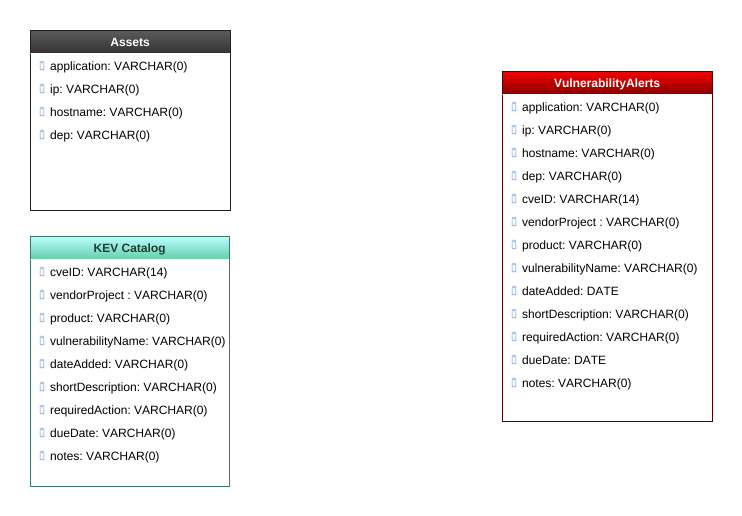

## Carga

Para a execução desta fase, foi utilizado o Azure Data Factory.


Segue abaixo o Data Flow que foi criado para o processo de ETL:

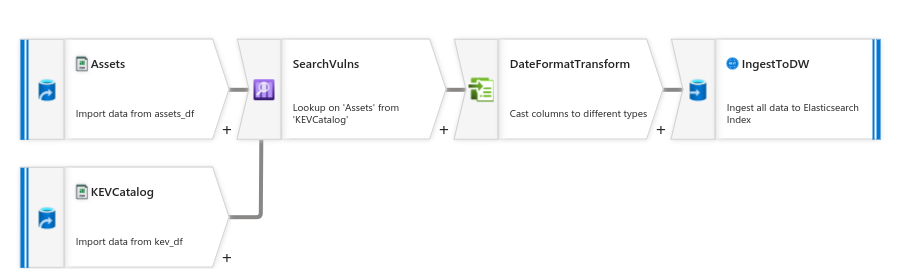


### Descrição do fluxo de Transformação e Carga

SearchVulns - Busca por registros no capo 'product' do dataset KEV que correspondam aos valores do campo 'application' do dataset Assets.
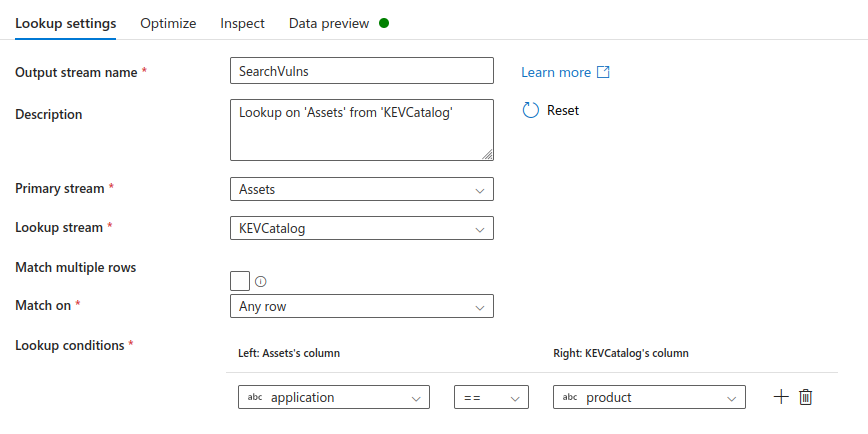

Os resultados são os alertas de vulnerabilidades que foram encontradas para as aplicações que estão descritas no inventário:


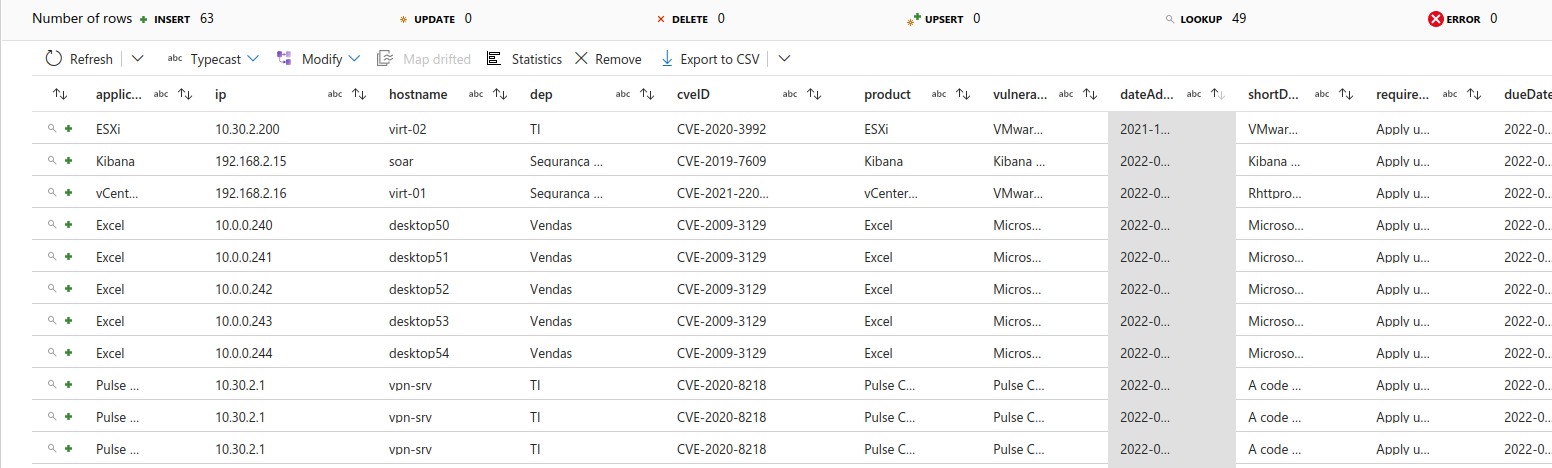


DateFormatTransform - os 2 campos de data são coletados e armazenados no Storage como string. Para inserirmos nos Data Warehouse, o ideal é convertê-los para o formato de data aceito pela plataforma (no caso, o Elasticsearch). O tipo de transformação feita foi a de 'Casting'.

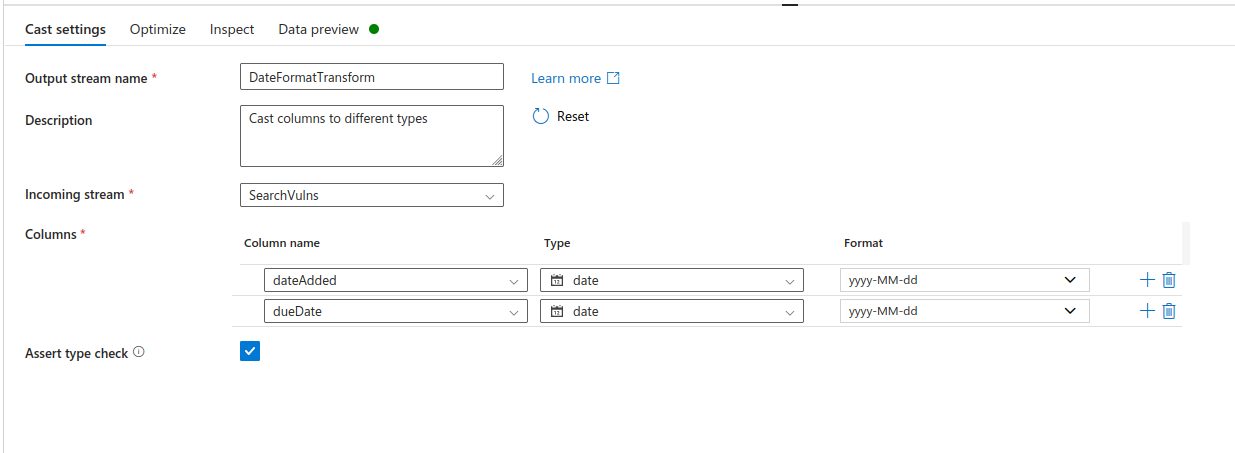

Visualização do campo já transformado:

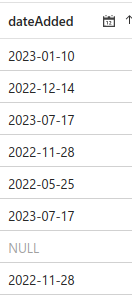


**IngestToDW** - nesta fase, foi inserida uma operação de 'Sink' no data flow, onde todos os alertas gerados serão inseridos no Data Warehouse. A plataforma escolhida foi o Elasticsearch (fora da cloud, em uma VPS que mantenho especificamente para o MVP). POr ser um banco documental NoSQL com API REST e e por ter uma plataforma de Analytics (Kibana) free, essa foi a melhor solução, no meu entendimento.

Foi criado um linked service do tipo REST, com toda a requisição preparada para fazer POST no cluster do Elastic, usando o índex 'vulnerability-alerts' para armazenar os documentos em formato JSON.

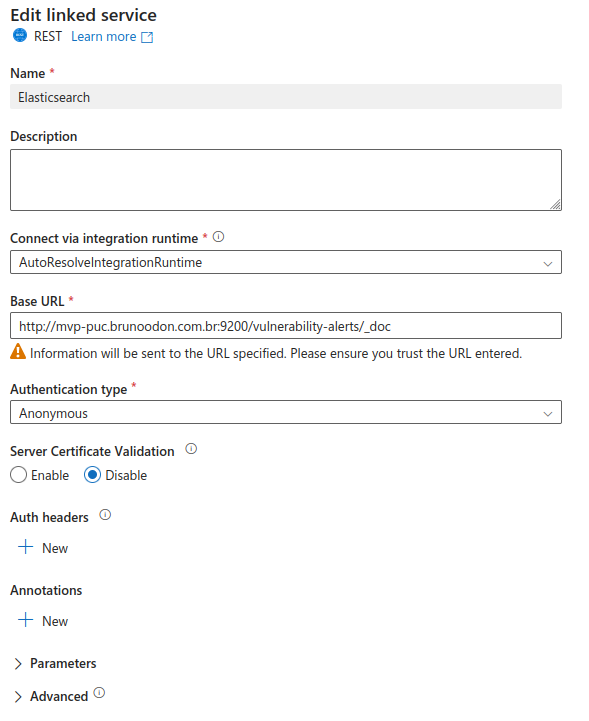


Logo depois, foi adicionada essa instância como dataset dentro do projeto:

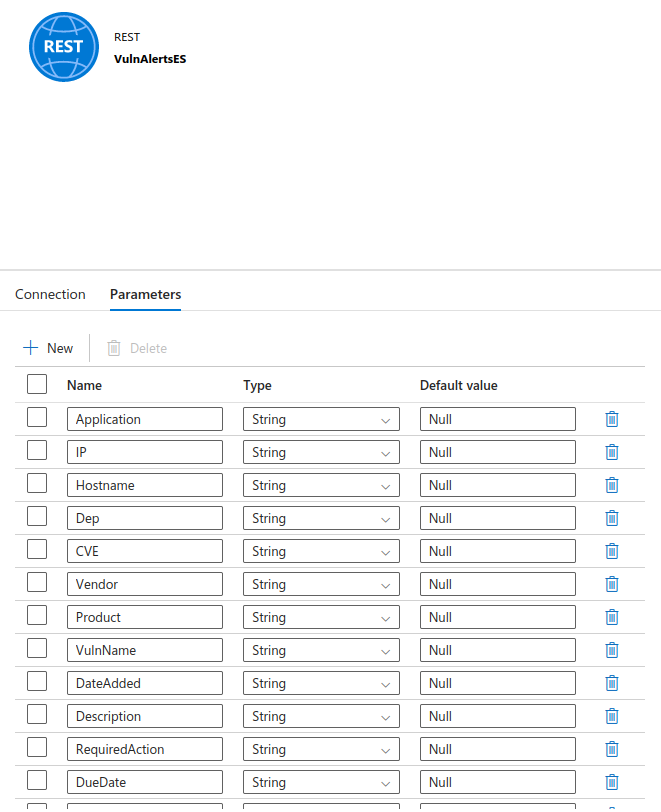


###**Pipelines**

Foi criado um pipeline com 2 ações para este projeto:

De 'Copy Data', para baixar o Catálogo KEV atualizado e copiá-lo para o conteiner do Blob Storage (origem) e outro;

De 'Data Flow', para a execução do fluxo de dados criado.

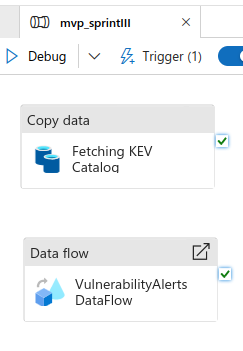

Foi criado um trigger com agendamento para execução do pipeline todo dia, às 23:50, até o dia 2/10.

Este catálogo é atualizado ao fim de cada dia e se faz necessária a execução agendada do pipeline para que sejam coletados todos os exploits mais recentes.

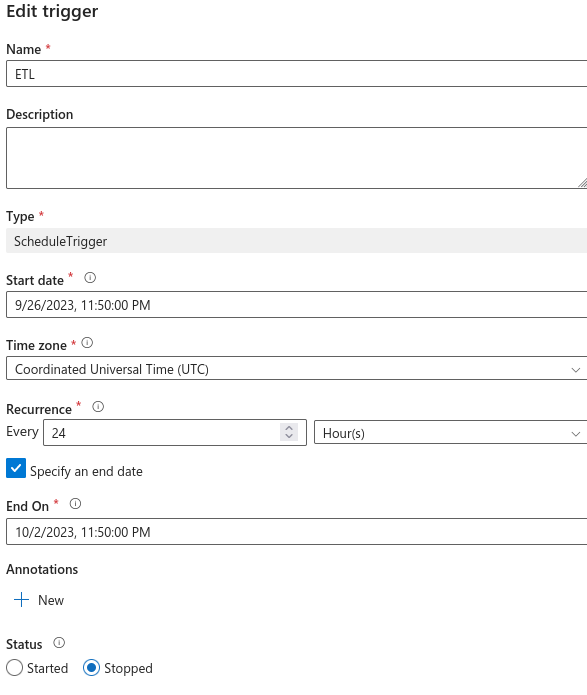


Segue o monitoramento das execuções do Pipeline, com período diferente (apenas para demostrar a eficácia):
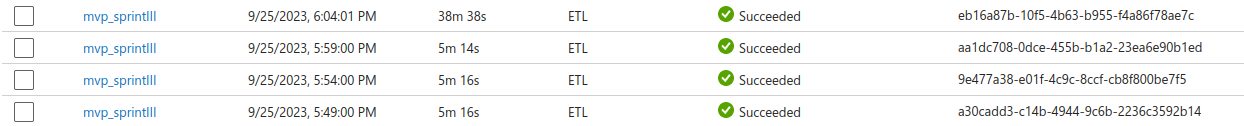

## **Análise**

Com os dados já inseridos dentro do DW, vamos para as análises.

### Qualidade dos dados

Como a única transformação necessária foi dos campos de data (e já foi realizada antes), não existe nenhum problema quanto aos formatos de dados inseridos no DW.

Quase terminando o MVP, percebi que alguns campos vieram com valor Null, por não haver CVE correspondente no KEV.

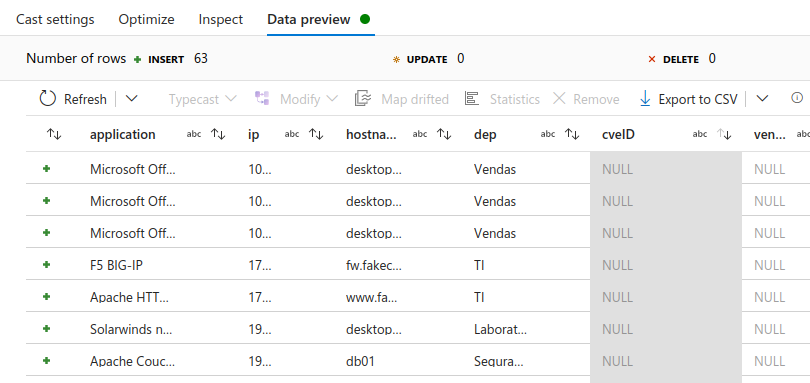

Por este motivo, adicionei uma transformação do tipo Filter, para filtrar apenas os 'notnulls':










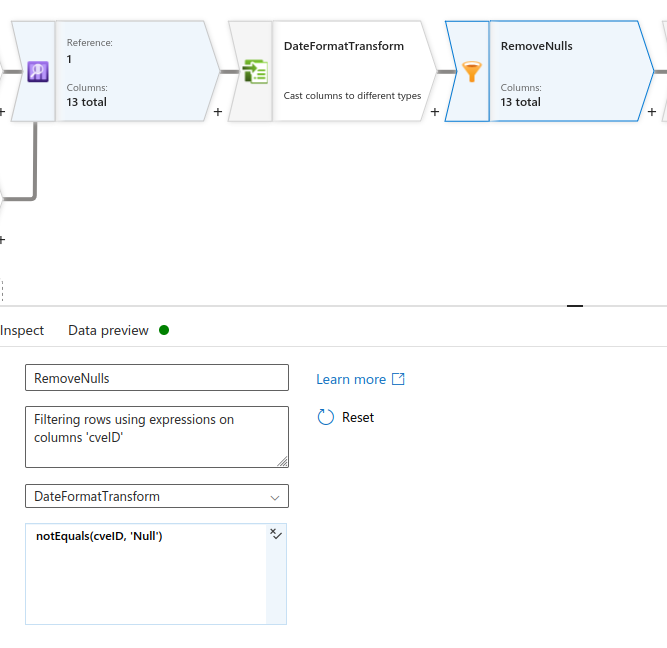


Por fim, apenas os campos com valores foram para o DW:

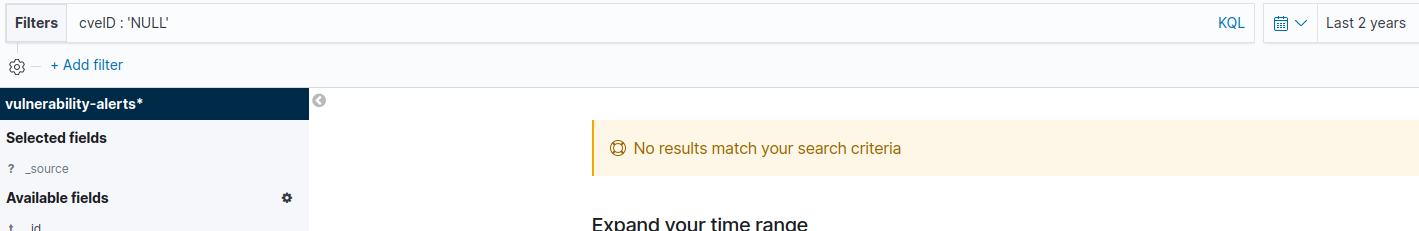

(query feita no Kibana)


###Resolução do problema

Para esta fase foi utilizada a plataforma Kibana, que possui ferramentas de analytics adequadas para a solução proposta.

O objetivo principal é o de obter alertas de vulnerabilidades recém exploradas encontradas em ativos da empresa, afim de conseguir resolver ou mitigar essas brechas de segurança antes que um ataque cibernético ocorra.

Podemos considerar que o objetivo foi alcançado. Segue a visão analítica de um alerta:

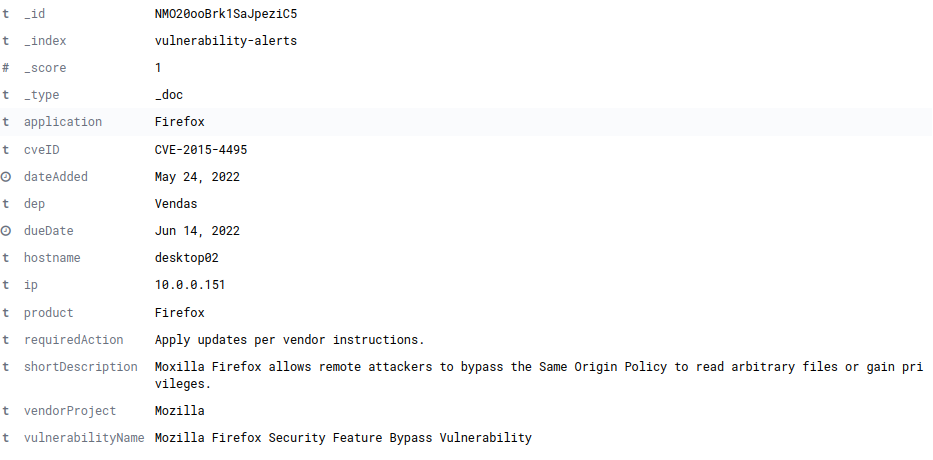

Foi criado também um Dashboard com muitas visões distintas sobre os alertas gerados:

**Linha do tempo de vulnerabilidades com exploits descobertas**

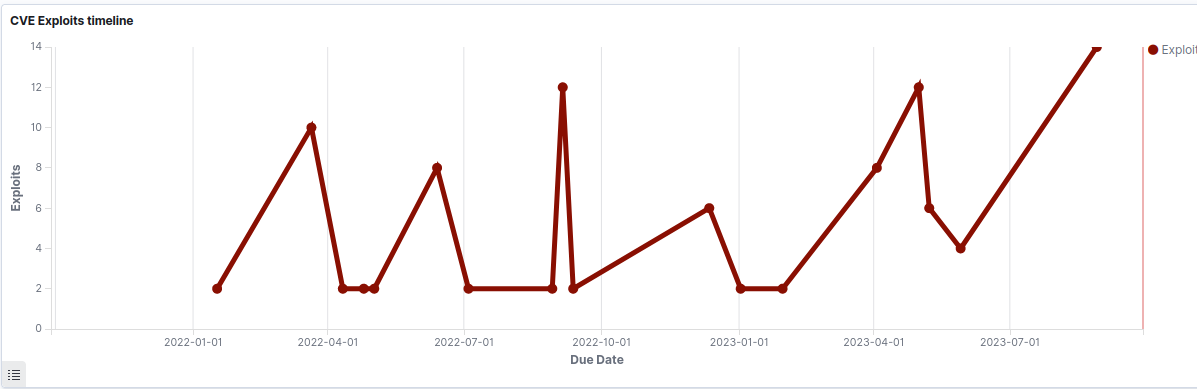

Repare que a data de referência é a de exploração da CVE (informação do KEV), o que (no fim do projeto) eu percebi que não era o ideal, e sim a data em que o alerta foi criado.

**Proporção de alertas por fabricante**

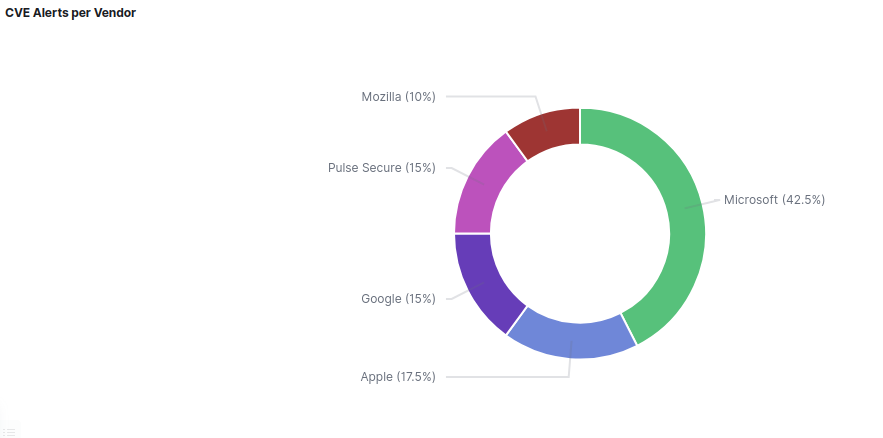

Neste gráfico, podemos perceber que a maioria das aplicações comprometidas são da Microsoft. Isso pode ajudar na tomada de decisão da estratégia que será adotada para correção dessas vulnerabilidades.


**Proporção de alertas por aplicação**
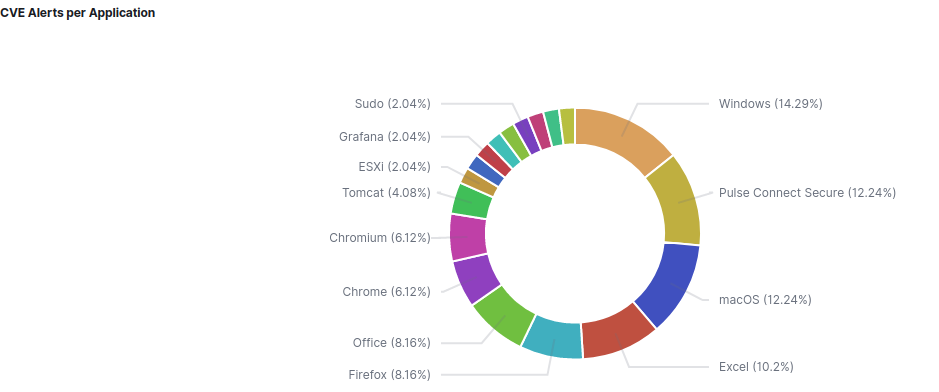


Neste gráfico Pie Chart, podemos perceber que a fatia grande de vulnerabilidades descolbertas em produtos Microsoft se deve à grande variedade das aplicações deste fabricante. Percebe-se que a distribuição é bem equilibrada.

**Top 10 de alertas por Host | Alertas por departamento**

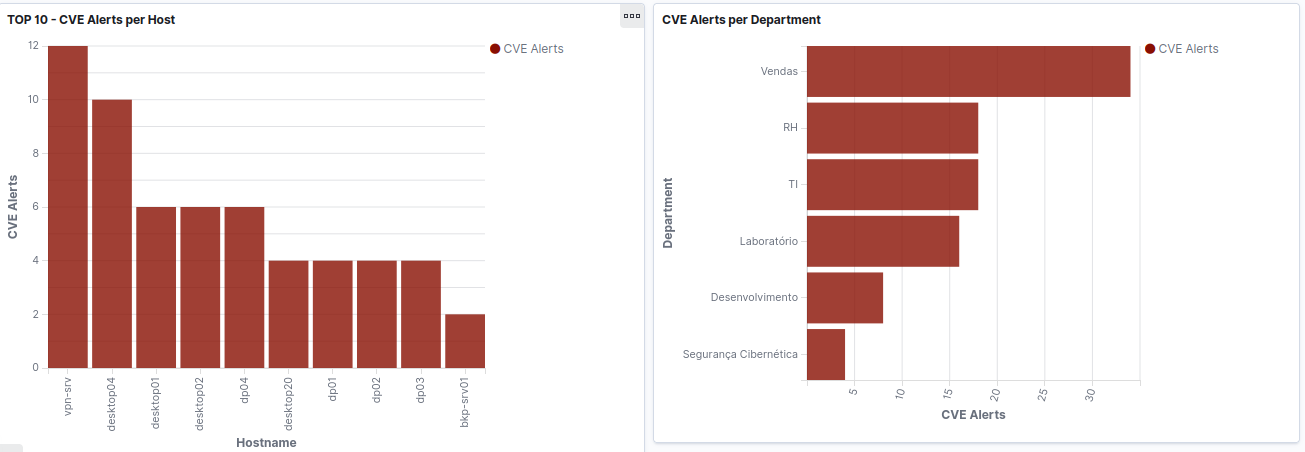

Nestes 2 gráficos do tipo Barra, podemos analisar:

* Que o departamento de Vendas precisa de muito mais atenção, pois possui muito mais alertas de CVEs que os demais.
* Que 1 só host do departamento de Segurança Cinbernética (vpn-srv) possui muito mais vulnerabilidades que todos os outros da companhia (12) e, por ser um servidor de VPN, merece atenção especial.

O Dashboard com os alertas está disponível [neste link](http://mvp-puc.brunoodon.com.br:5601/goto/cfba0cfaf12416c7991d564028ab9d1b).




##**Conclusão**

Aliar Data Science aos Frameworks e fluxos de Cyber Security é uma excelente solução para ganhar tempo na resolução de questões que demandariam dias de esforço manual e, talvez, uma quantidade grande de profissionais envolvidos, além de dar uma visão mais ampla dessa anomalias.

Não é atoa que muitas plataformas de segurança já optam por soluções clusterizadas de Data Warehouses NoSQL. Como exemplo o [Wazuh](https://wazuh.com/), uma solução de SIEM escalável baseada em Elasticsearch.

